In [1]:
from assign1 import *
from generate_maze import *

import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
explored_df = pd.DataFrame({'width':[],'DFS':[],'BFS':[],"GBFS":[],"A*":[],"Djikstra":[]})
path_len_df = pd.DataFrame({'width':[],'DFS':[],'BFS':[],"GBFS":[],"A*":[],"Djikstra":[]})
time_df = pd.DataFrame({'width':[],'DFS':[],'BFS':[],"GBFS":[],"A*":[],"Djikstra":[]})

explored_df

,width,DFS,BFS,GBFS,A*,Djikstra


In [4]:
import time

def evaluate_algo(maze, algo):
    st = time.time() # get the start time
    if algo == "DFS":
        explored, path = DFS(maze)
    elif algo == "BFS":
        explored, path = BFS(maze)
    elif algo == "GBFS":
        explored, path = GBFS(maze)
    elif algo == "A*":
        explored, path = A_star(maze)
    elif algo == "Djikstra":
        explored, path = dijkstra(maze)
    et = time.time() # get the end time

    elapsed = (et - st)*1000

    return explored, path, elapsed

In [15]:
widths = [i for i in range(10, 201, 10)]

for i, w in enumerate(widths):
    maze = generate_maze(w,w)

    explored_df = explored_df.append({'width':w,'DFS':0,'BFS':0,"GBFS":0,"A*":0,"Djikstra":0}, ignore_index=True)
    path_len_df = path_len_df.append({'width':w,'DFS':0,'BFS':0,"GBFS":0,"A*":0,"Djikstra":0}, ignore_index=True)
    time_df = time_df.append({'width':w,'DFS':0,'BFS':0,"GBFS":0,"A*":0,"Djikstra":0}, ignore_index=True)
    
    for algo in ["DFS", "BFS", "GBFS", "A*", "Djikstra"]:
        explored, path, elapsed = evaluate_algo(maze, algo)

        if explored is not None:
            explored_df.loc[i, algo] = len(explored)
            path_len_df.loc[i, algo] = len(path)
        else:
            explored_df.loc[i, algo] = explored
            path_len_df.loc[i, algo] = path
        time_df.loc[i, algo] = elapsed

    print("Done test case", i)

Done test case 0
Done test case 1
Done test case 2
Done test case 3
Done test case 4
Done test case 5
Done test case 6
Done test case 7
Done test case 8
Done test case 9
Done test case 10
Done test case 11
Done test case 12
Done test case 13
Done test case 14
Done test case 15
Done test case 16
Done test case 17
Done test case 18
Done test case 19


In [16]:
explored_df

,width,DFS,BFS,GBFS,A*,Djikstra
0,10.0,34.0,25.0,13.0,13.0,22.0
1,20.0,59.0,33.0,23.0,24.0,31.0
2,30.0,248.0,382.0,210.0,160.0,378.0
3,40.0,301.0,144.0,57.0,107.0,140.0
4,50.0,154.0,600.0,215.0,248.0,583.0
5,60.0,852.0,1229.0,669.0,440.0,1205.0
6,70.0,933.0,2101.0,297.0,568.0,2096.0
7,80.0,483.0,293.0,109.0,189.0,289.0
8,90.0,560.0,1849.0,528.0,801.0,1818.0
9,100.0,607.0,2253.0,730.0,686.0,2159.0


In [17]:
path_len_df

,width,DFS,BFS,GBFS,A*,Djikstra
0,10.0,19.0,12.0,12.0,12.0,12.0
1,20.0,45.0,20.0,20.0,20.0,20.0
2,30.0,61.0,61.0,61.0,61.0,61.0
3,40.0,78.0,50.0,50.0,50.0,50.0
4,50.0,92.0,92.0,92.0,92.0,92.0
5,60.0,93.0,93.0,93.0,93.0,93.0
6,70.0,147.0,147.0,147.0,147.0,147.0
7,80.0,191.0,70.0,70.0,70.0,70.0
8,90.0,178.0,178.0,178.0,178.0,178.0
9,100.0,141.0,141.0,141.0,141.0,141.0


In [18]:
time_df

,width,DFS,BFS,GBFS,A*,Djikstra
0,10.0,0.998974,0.000000,0.000000,0.999212,0.000000
1,20.0,0.000000,0.000000,0.999928,0.999928,0.000000
2,30.0,1.999855,2.502441,3.013611,2.996683,10.510683
3,40.0,2.511263,1.000166,2.001047,2.999783,7.505894
4,50.0,2.003908,6.506443,3.998756,2.509594,48.352480
5,60.0,11.016846,19.987822,6.505489,6.000519,122.323990
6,70.0,14.021158,53.399563,5.508423,8.511782,279.615164
7,80.0,6.501198,5.002499,6.510496,7.507086,58.299541
8,90.0,10.952950,45.990229,8.511305,12.012959,417.671204
9,100.0,11.507988,65.024376,12.516022,13.985872,666.306019


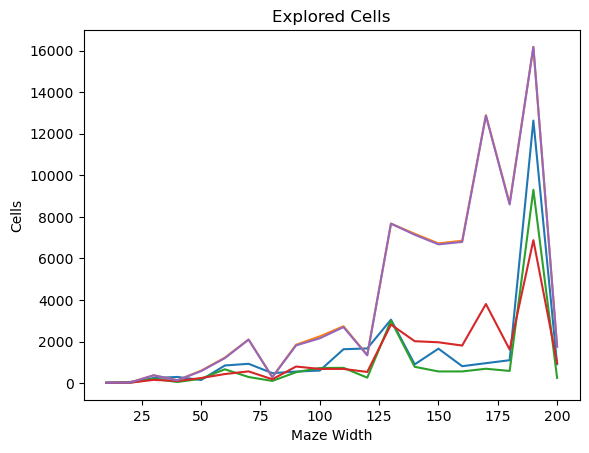

In [27]:
import matplotlib.pyplot as plt

explored_df_2 = explored_df.set_index("width")
plt.plot(explored_df_2)
plt.xlabel("Maze Width")
plt.ylabel("Cells")
plt.title("Explored Cells")

plt.show()

<AxesSubplot:xlabel='width'>

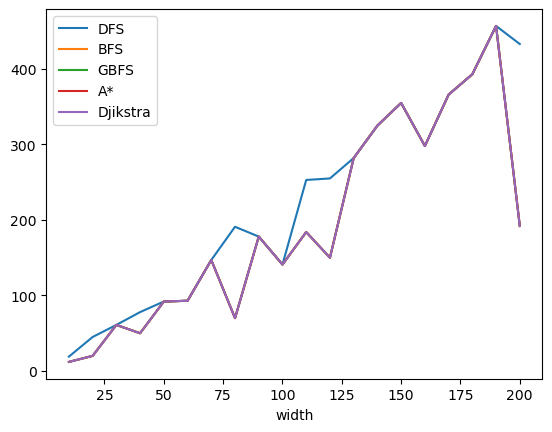

In [22]:
path_len_df.set_index("width").plot()

<AxesSubplot:xlabel='width'>

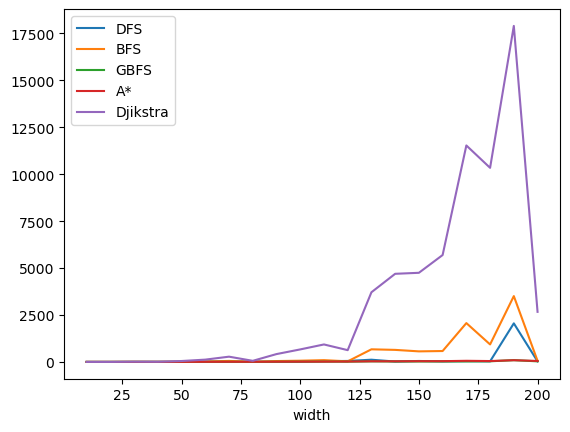

In [23]:
time_df.set_index("width").plot()